# Introducción

## ¿Qué es el procesamiento de lenguaje natural?

El procesamiento del lenguaje natural, también conocido como *Natural Language Processing* (NLP) en inglés, es un campo de la inteligencia artificial que se enfoca en el estudio y la comprensión de las interacciones entre las máquinas y las personas mediante el uso de lenguajes naturales, como el español o el inglés. El objetivo principal del NLP es permitir a las máquinas comprender, interpretar y generar el lenguaje humano de manera efectiva.

Este campo de estudio abarca un amplio abanico de aplicaciones que tienen un impacto significativo en nuestra vida cotidiana. Por ejemplo, el NLP se utiliza en la detección y filtrado de correos electrónicos fraudulentos o spam, lo que nos ayuda a mantener nuestras bandejas de entrada libres de contenido no deseado. Además, el NLP desempeña un papel muy importante en el desarrollo de asistentes virtuales como Siri o Google Assistant, permitiéndonos interactuar de manera natural con estos sistemas a través de comandos de voz o mensajes de texto. Otras aplicaciones del NLP incluyen la traducción de idiomas, la generación de resúmenes y filtrado de textos, el análisis de sentimientos en redes sociales, la extracción de información de grandes volúmenes de datos textuales, la respuesta automática a preguntas frecuentes y la mejora de la accesibilidad mediante la transcripción automática de contenido auditivo. Estas aplicaciones muestran cómo el NLP está transformando la forma en que interactuamos con la tecnología y cómo procesamos la información en el mundo digital.


## NLP con Python

En este *notebook*, se utilizarán dos bibliotecas de procesamiento de lenguaje natural en Python. Por un lado, contamos con *NLTK*, que incluye una amplia variedad de tareas y algoritmos para el procesamiento de lenguaje natural. Esta biblioteca fue creada en 2001 y, a pesar de que existen alternativas más modernas, sigue siendo ampliamente utilizada debido a la extensa gama de funcionalidades que ofrece. Por otro lado, tenemos *spaCy*, una biblioteca mucho más moderna y eficiente, creada en 2015 y diseñada para proporcionar algoritmos rápidos y eficientes de procesamiento de lenguaje natural.

Ambas bibliotecas son ampliamente reconocidas en la comunidad de NLP y ofrecen una amplia gama de funcionalidades para tareas como el etiquetado de partes del discurso, el análisis sintáctico, la lematización, la extracción de entidades, el reconocimiento de nombres propios, la tokenización y mucho más. A lo largo de este *notebook* se presenta como podemos utilizar estas librerías para resolver problemas típicos de este ámbito y exploraremos con ejemplos prácticos cómo aprovechar al máximo las funcionalidades que ofrecen *NLTK* y *spaCy*.

# Introducción a *spaCy*

*SpaCy* es una librería gratuita y *open-source* diseñada especialmente para procesar grandes cantidades de texto.  Actualmente tiene soporte para más de 72 idiomas y proporciona multitud de funcionalidades, componentes y modelos para tareas de procesamiento de lenguaje. También está diseñado para faciltar su despliegue en producción, e incluso para interactuar o soportar modelos propies desarrollados con otras librerías o frameworks como *PyTorch* o *TensorFlow*. Gran parte de la información que se presenta en este documento referente a *spaCy* puede encontrarse en mayor detalle en la propia documentación disponible en <https://spacy.io>.

## Instalación

Aunque lo más recomendable es seguir las instrucciones de instalación de la propia documentación (https://spacy.io/usage), a continuación se presentan los pasos generales para poder trabajar con *spaCy*. Lo más habitual es utilizar el gestor de paquetes de Python (pip o pip3 según la versión) de la siguiente forma:

```console
$ pip3 install spacy
```

A continuación, dado que *spaCy* requiere de modelos lingüísticos para funcionar, es necesario descargar uno según el idioma que se necesite. Por ejemplo, para descargar el modelo lingüístico en español, es necesario ejecutar el siguiente comando:

```console
$ python -m spacy download es_core_news_sm
```

Ahora ya puedes hacer uso de *spaCy* y solo tienes que importar y cargar el modelo en tu código de la siguiente forma:

```python
import spacy
nlp = spacy.load("es_core_news_sm")
```

## Tokenización

Uno de los conceptos más relevantes del NLP es el proceso de *tokenización*. Este proceso consiste en segmentar o dividir el texto en unidades más pequeñas denominadas como *tokens*. En términos generales, un *token* puede ser una palabra, un signo de puntuación, un número, un símbolo u otra unidad discreta de texto. Durante la etapa de *tokenización*, separamos el texto dividiéndolo a partir de los espacios en blanco o caracteres de puntuación. Sin embargo, los *tokens* no se limitan exclusivamente a palabras completas, también pueden incluir partes de palabras, como prefijos o sufijos, y en algunos casos pueden tratarse de caracteres individuales.

El proceso de *tokenización* es un paso muy importante, ya que permite analizar y manipular el texto en unidades más manejables y significativas. Por tanto, se puede decir que los *tokens* actúan como los componentes básicos que se utilizan para realizar diversas tareas de NLP, como el análisis gramatical, la extracción de información, etc. 

En el momento en el que nosotros procesamos un texto con *spaCy*, el primer paso que realiza la librería es *tokenizar* dicho texto para devolvernos un objeto del dipo *Doc*. Para *spaCy*, un documento (*Doc*) es una contenedor de *tokens* que, como se presenta en el siguiente código, podemos iterar.  

In [1]:
import spacy

nlp = spacy.load("es_core_news_sm")
doc = nlp("Un soneto me manda hacer Violante...")
tokens = [token.text for token in doc]
print(tokens)

['Un', 'soneto', 'me', 'manda', 'hacer', 'Violante', '...']


## *POS tagging* y dependencias gramaticales

Una vez *tokenizado* un texto y convertido a documento, podemos realizar un etiquetado de las distintas partes del discurso. Esto consiste en asignar una etiqueta gramatical a cada palabra según su función o categoría gramatical en la oración como sustantivo, verbo, adjetivo, adverbio, preposición, conjunción, etc. Este análisis morfológico o gramatical es conocido en NLP como *Part-Of-Speech tagging* o simplemente *POS tagging*. 

El *POS tagging* ayuda a comprender la estructura y el significado de una oración, permitiendo analizar cómo interactúan las palabras en una oración y cómo contribuyen al significado general. Dicho esto, a continuación se presenta un sencillo código en el que, utilizando *spaCy*, podemos realizar un etiquetado gramatical de cualquier sentencia u oración.

In [2]:
import spacy

nlp = spacy.load("es_core_news_sm")
doc = nlp("Un soneto me manda hacer Violante...")
tokens = [ f'{token.text} ({token.tag_})' for token in doc]
print(tokens)

['Un (DET)', 'soneto (NOUN)', 'me (PRON)', 'manda (VERB)', 'hacer (VERB)', 'Violante (PROPN)', '... (PUNCT)']


La librería *spaCy* nos permite incluso representar de forma visual las dependencias gramaticales de una frase. Para lograr esto, además de importar *spaCy*, debemos importar el módulo *displacy* que nos proporciona la funcionalidad para visualizar estas dependencias.

In [3]:
from spacy import displacy

sentence_spans = list(doc.sents)
_ = displacy.render(doc, style='dep', options={"distance" : 100}, jupyter=False)

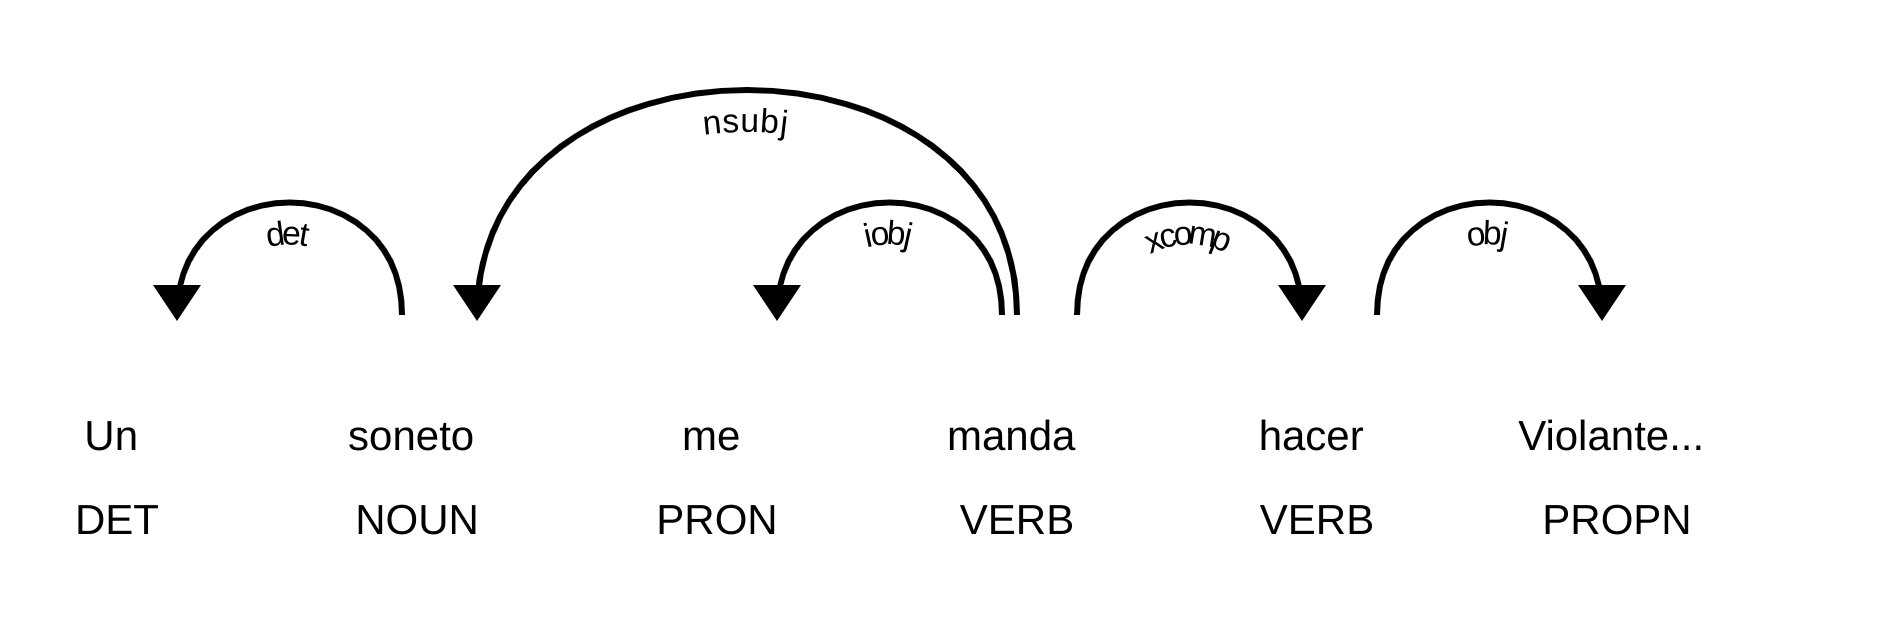

## *Lemming* o  Lematización

Otro proceso muy utilizado en el ámbito del NLP es lo que se conoce como lematización, que consiste en determinar el lema o la forma base de una palabra. El lema representa la forma canónica de una palabra, que generalmente se encuentra en su forma no conjugada o no declinada. Es decir, la lematización busca el lema adecuado en función del contexto y la categoría gramatical de la palabra en la oración. Este proceso se lleva a cabo para reducir las palabras a su forma base, lo que ayuda a agrupar variantes flexionadas de una palabra en una sola entidad, facilitando el análisis y la comprensión del texto.

In [4]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['uno', 'soneto', 'yo', 'mandar', 'hacer', 'Violante', '...']


## Palabras poco significativas o *stop words*

La librería *spaCy* incluye un conjunto de palabras denominadas *stop words* que se consideran poco significativas, es decir que no aportan información o valor al texto en el que se encuentran. El conjunto de *stop words* permite omitir estas palabras durante el procesamiento de textos, lo que puede mejorar la eficiencia y la calidad de los resultados, ya que al eliminar las palabras poco significativas, el enfoque se centra en las palabras clave y los términos más relevantes.

A continuación se muestra el conjunto de palabras poco significativas por defecto que ofrece *spaCy* en español.

In [5]:
print(nlp.Defaults.stop_words)

{'solo', 'mas', 'un', 'vuestro', 'llegó', 'cuatro', 'teneis', 'mismo', 'haber', 'tarde', 'nueve', 'siendo', 'despues', 'haya', 'muchos', 'quien', 'todavia', 'últimos', 'había', 'lado', 'podrian', 'vuestra', 'podrían', 'hasta', 'en', 'vez', 'través', 'podeis', 'ir', 'suyo', 'suyas', 'todas', 'ser', 'hemos', 'tendrá', 'nuestros', 'soy', 'nuevas', 'cómo', 'buenos', 'aquellos', 'uso', 'cuanta', 'estan', 'hubo', 'dieron', 'ellas', 'consiguen', 'hecho', 'hacen', 'mismos', 'cuáles', 'agregó', 'nueva', 'estais', 'hacer', 'podria', 'ello', 'ti', 'tan', 'realizar', 'estado', 'va', 'quizá', 'unos', 'aquel', 'podemos', 'será', 'nosotras', 'haces', 'estados', 'propias', 'tiene', 'hacerlo', 'bajo', 'eres', 'mi', 'seis', 'dicho', 'quiere', 'poca', 'muy', 'usamos', 'debe', 'habrá', 'propio', 'conseguir', 'su', 'usan', 'les', 'alguna', 'algo', 'ultimo', 'estaba', 'eran', 'ellos', 'eso', 'siete', 'pesar', 'saben', 'once', 'manifestó', 'modo', 'cinco', 'mias', 'quiza', 'asi', 'suya', 'desde', 'gran', 'mí

Evidentemente podemos añadir palabras que consideremos poco significativas en nuestro contexto, e incluso también podemos eliminar palabras que sí consideramos que aportan valor a nuestros textos. Por ejemplo, a continuación vamos a ver si la palabra 'coche', es considerada un *stop word*. Si no lo es, vamos a añadirla a nuestro conjunto de palabras poco significativas.

In [6]:
print("Por defecto: ", end='')
print(nlp.vocab['coche'].is_stop) 

nlp.Defaults.stop_words.add('coche')
nlp.vocab['coche'].is_stop = True
print("Después de añadirla: ", end='')
print(nlp.vocab['coche'].is_stop) 

nlp.Defaults.stop_words.remove('coche')
nlp.vocab['coche'].is_stop = False
print("Después de eliminarla: ", end='')
print(nlp.vocab['coche'].is_stop) 

Por defecto: False
Después de añadirla: True
Después de eliminarla: False


## Reconocimiento de entidades 

Otro aspecto muy habitual en el ámbito del procesamiento del lenguaje es el reconocimiento de entidades. De nuevo, *spaCy* cubre esta funcionalidad, permitiendo detectar y extraer entidades, como nombres de personas, lugares y organizaciones entre otros. Este proceso, conocido también como reconocimiento de entidades nombradas o NER por sus siglas en inglés, puede ser útil en una amplia gama de aplicaciones, desde la extracción de información hasta el análisis de sentimientos. 

In [7]:
doc = nlp("Google es una de las empresas tecnológicas más conocidas en Estados Unidos, según Antonio")
entities = [f'{entity.text} ({entity.label_})' for entity in doc.ents]
print(entities)

['Google (ORG)', 'en Estados Unidos (LOC)', 'Antonio (PER)']


## Similitud entre objetos y *word vectors*

Una funcionalidad muy interesante que ofrece *spaCy* es el cálculo de lo mucho que se parecen dos objetos. Y con objetos en este caso se refiere a instancias de tipo *Doc* y *Token* entre otros. Esta operación se determina comparando lo que se conoce como *word vectors* o *word embeddings*, que consiste en un vector que representa el significado de la palabra.

Estos vectores se calculan de forma interna mediante el algoritmo de *Word2Vec*. Se trata de una técnica ampliamente utilizada en NLP propuesta por Tomas Mikolov y su equipo de Google en 2013 para representar palabras como vectores numéricos en un espacio multidimensional. El algoritmo utiliza una red neuronal artificial de dos capas, una capa oculta y una capa de salida, que toma como entrada un corpus grande de texto y produce un espacio vectorial, generalmente de varias dimensiones, donde cada palabra única del corpus se le asigna un vector correspondiente en el espacio.

A partir de los *word vectors*, *spaCy* ya permite comparar el significado de las palabras o *tokens*. Por su parte, para comparar la similitud entre objetos de tipo *Doc* o aquellos que agrupan varias palabras, la librería simplemente calcula la media de los vectores. Esto implica tener en cuenta un detalle importante, y es que calcular la media de múltiples *tokens* o palabras hace que el resultado no diferencie el orden de las palabras. Por tanto, dos documentos que expresen el mismo significado con una redacción distinta devolverán una puntuación de similitud más baja que dos documentos que contengan las mismas palabras pero expresen significados diferentes.

El siguiente código muestra para cuatro palabras la norma del *word vector* que proporciona *spaCy*, además de si se encuentra fuera del vocabulario del modelo del lenguaje cargado. Para que funcione correctamente, es necesario instalar y cargar un modelo más grande que el que teníamos hasta ahora.

Para instalar, ejecutamos:

```console
$ python -m spacy download es_core_news_md
```
Y ahora simplemente cargamos el modelo de lenguaje para obtener los *word vectors*.

In [8]:
nlp = spacy.load("es_core_news_md")
doc = nlp("verdades cuatro leones añlkds")

print("Token          | Norma del vector | Fuera del vocabulario")
print("---------------------------------------------------------")
for token in doc:
    print(f'{token.text.ljust(14)} | {str(token.vector_norm).ljust(16)} | {str(token.is_oov).ljust(19)}')

Token          | Norma del vector | Fuera del vocabulario
---------------------------------------------------------
verdades       | 32.23495         | False              
cuatro         | 29.143133        | False              
leones         | 26.798233        | False              
añlkds         | 0.0              | True               


Y ahora, podemos consultar la similitud de varios documentos de la siguiente forma. La primera y segunda sentencia, procesada en *doc_a* y *doc_b* respectivamente, transmiten un significado similar, por lo que se espera que el valor de similitud proporcionado se acerque a uno. Por el contrario, la tercera sentencia procesada en *doc_c* transmite un significado totalmente contrario, por lo que se espera que su similitud con la primera sea cercana a cero.

In [9]:
doc_a = nlp("La perseverancia es la clave para alcanzar el éxito")
doc_b = nlp("El éxito se logra a través de la persistencia constante")
doc_c = nlp("Por mucho que trabajes no vas a tener éxito")

print("Similitud en el significado de doc_a frente a doc_b: ", 
      doc_a.similarity(doc_b))
print("Similitud en el significado de doc_a frente a doc_c: ", 
      doc_a.similarity(doc_c))

Similitud en el significado de doc_a frente a doc_b:  0.6794723860541483
Similitud en el significado de doc_a frente a doc_c:  0.18843177410387596


## Emparejamiento y búsqueda de patrones

Otra de las funcionalidades que ofrece la biblioteca *spaCy* es la capacidad de buscar y emparejar patrones específicos en textos, ya sea en archivos o en cadenas de texto. Esta funcionalidad es útil para extraer información específica o realizar tareas de filtrado y análisis en grandes conjuntos de datos de texto.

In [10]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)
pattern = [{"LOWER": "servicios"}, {"LOWER": "web"}] 
matcher.add("my_pattern", [pattern])

doc = nlp("En mi empresa nos dedicamos a desarrollar servicios web")
matches = matcher(doc)
print(f'Patrón encontrado del índice {matches[0][1]} al {matches[0][2]}.')

Patrón encontrado del índice 7 al 9.


Con esto, hemos introducido algunos de los conceptos básicos de NLP, pero cabe recalcar que son sólo algunos ejemplos de las funcionalidades que ofrece *spaCy*. En la siguiente sección vamos a mostrar también algunas de las funcionalidades básicas de NLTK para familiarizarnos con la librería y asentar las bases del procesamiento de lenguaje natural. 

# Introducción a *NLTK*

## Instalación

Al igual que con la anterior librería, para instalar *NLTK* en Python debemos hacer uso del gestor de paquetes de Python. A continuación se muestra el comando para instalar la librería en Python 3:

```console
$ pip3 install nltk
```

*NLTK* proporciona varios recursos adicionales, como conjuntos de datos y modelos preentrenados. Puedes descargarlos ejecutando el siguiente código en Python:


```python
import nltk
nltk.download()
```

Esto abrirá la interfaz gráfica de descarga de *NLTK*, donde podrás seleccionar los recursos que deseas descargar. Si prefieres realizar la descarga directamente en el código, puedes utilizar el siguiente código para descargar todos los recursos:


```python
import nltk
nltk.download("all")
```

## *Tokenización*

Como se ha detallado previamente, la *tokenización* es el proceso de dividir un texto en unidades más pequeñas, generalmente palabras y signos de puntuación. *NLTK* proporciona diversas opciones para tokenizar texto. A continuación se muestra un ejemplo de tokenización de una oración utilizando la *tokenización* por palabras.

In [11]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download("punkt")

text = "NLTK es una biblioteca para el procesamiento de lenguaje natural."
tokens = word_tokenize(text)
print(tokens)

['NLTK', 'es', 'una', 'biblioteca', 'para', 'el', 'procesamiento', 'de', 'lenguaje', 'natural', '.']


## *Stemming* 

El *stemming* (radicalización) es el proceso de reducir una palabra a su raíz o base. Tiene una finalidad parecida a la lematización, pero la principal diferencia es que el *stemming* simplemente elimina los sufijos de una palabra para obtener una forma base aproximada. En cambio, la lematización utiliza información morfológica y gramatical más compleja para determinar el lema adecuado. *NLTK* ofrece varios algoritmos de stemming. A continuación se muestra un ejemplo utilizando el algoritmo de Porter:

In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["corriendo", "corre", "corrió"]
stemmed_words = [stemmer.stem(word) for word in words]
print(stemmed_words)

['corriendo', 'corr', 'corrió']


## *POS tagging*

El etiquetado de partes del discurso (*POS tagging*) consiste en asignar una etiqueta gramatical a cada palabra en un texto. *NLTK* proporciona varios modelos y etiquetadores para realizar el *POS tagging*. A continuación se muestra un ejemplo de este proceso utilizando el etiquetador por defecto de *NLTK*.

In [13]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# nltk.download('averaged_perceptron_tagger')

text = "NLTK es una biblioteca para el procesamiento de lenguaje natural."
tokens = word_tokenize(text)
tagged_words = pos_tag(tokens)
print(tagged_words)

[('NLTK', 'NNP'), ('es', 'CC'), ('una', 'JJ'), ('biblioteca', 'NN'), ('para', 'NN'), ('el', 'FW'), ('procesamiento', 'FW'), ('de', 'FW'), ('lenguaje', 'FW'), ('natural', 'JJ'), ('.', '.')]


# Clasificación de mensajes spam

La identificación de mensajes o correo no deseado es una de las aplicaciones más conocidas del NLP. El problema consiste en clasificar y separar los mensajes sms o correos no deseados (*spam*) de los correos legítimos (*ham*).  A continuación se presentan diferentes formas de como abordar este problema con las librerías presentadas a lo largo de este documento. Para ello, vamos a utilizar un conjunto de datos en los que aparecen mensajes ya etiquetados como *ham* o *spam*. Pero antes de implementar las distintas soluciones, es importante analizar y entender el conjunto de datos con los que vamos a trabajar a lo lago de esta sección. Para ello vamos a utilizar principalmente dos librerías muy conocidas en el ámbito del análisis de datos: *pandas* y *matplotlib*. La primera librería nos permite cargar y trabajar con datos en formato *csv* o *tsv* de forma eficiente y muy práctica. La segunda, nos permite generar gráficas de forma rápida y sencilla. 

Primero, importamos ambas librerías. Cabe recordar que deben estar instaladas en el equipo para poder completar este paso. Una vez importadas, vamos a cargar nuestro *dataset* con los mensajes etiquetados en un *DataFrame*.   

In [14]:
import pandas
import matplotlib.pyplot as plt

dataset_path = 'resources/sms_spam_collection/data'
sms_df = pandas.read_csv(dataset_path, sep='\t', names=['label', 'message'])
display(sms_df)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Una de las primeras cosas que podemos observar sobre el *dataset* es la cantidad de mensajes de tipo *spam* frente a la cantidad de mensajes de tipo *ham*. Para ello, calculamos la cantidad en proporción de los dos tipos de mensajes sobre el total y lo mostramos de forma gráfica.

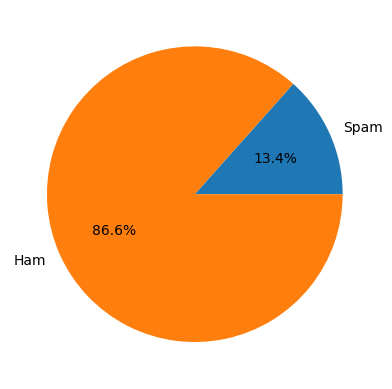

In [15]:
total_len  = len(sms_df)
ham_len    = len(sms_df[sms_df['label'] == 'ham'])
ham_ratio  = ham_len * 100 / total_len
spam_len   = len(sms_df[sms_df['label'] == 'spam'])
spam_ratio = spam_len * 100 / total_len

labels = ['Spam', 'Ham']
values = [spam_ratio, ham_ratio] 
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

Como se puede observar, contamos con un porcentaje mucho mayor de mensajes de tipo *ham* frente al porcentaje de tipo *spam*. Es probable que esta información sea relevante tenerla en cuenta en el momento de preparar los datos para entrenar modelos de clasificación. 

Ahora, vamos a ver si existe alguna relación entre el tamaño de los mensajes y el tipo de mensaje. Para ello creamos una nueva columna en nuestro *DataFrame* que represente el tamaño del mensaje en caracteres. 

In [16]:
sms_df['length'] = sms_df['message'].apply(len)
display(sms_df)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


Con esta nueva columna, podemos mostrar un histograma del tamaño de los mensajes más frecuentes del tipo *ham* y *spam* para ver si existe alguna relación entre el tamaño y el tipo de mensaje.

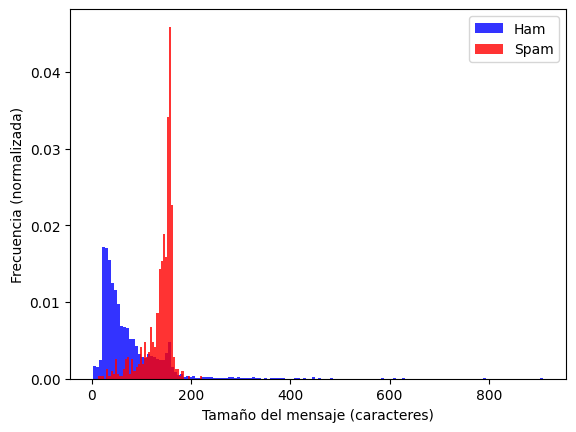

In [17]:
spam = sms_df[sms_df['label'] == 'spam']['length']
ham = sms_df[sms_df['label'] == 'ham']['length']

plt.figure()
plt.hist(ham, bins=150, alpha=0.8, label='Ham', color='blue', density=True)
plt.hist(spam, bins=50, alpha=0.8, label='Spam', color='red', density=True)
plt.xlabel('Tamaño del mensaje (caracteres)')
plt.ylabel('Frecuencia (normalizada)')
plt.legend(loc='upper right')
plt.show()

Como se puede apreciar, los mensajes oscilan principalmente entre 0 y 200 caracteres de longitud. Y si bien es cierto que hay una gran cantidad de mensajes de tipo *spam* cuya longitud es superior a los mensajes de tipo *ham*, esta información es insuficiente para clasificar o separar ambas clases a partir de este atributo. Si la diferencia entre ambos tipos fuera más clara, se podría utilizar un sencillo modelo de clasificación lineal para separar y diferenciar las dos clases.

Ahora lo que podemos hacer es aprovecharnos de lo que hemos visto hasta ahora sobre el procesamiento de lenguaje natural para explotar las características de los mensajes. Lo que vamos a hacer en las siguientes secciones es utilizar las funcionalides que ofrecen las librerías *spaCy* y *NLTK* para procesar los mensajes de nuestro *dataset*. Una vez los mensajes hayan sido procesados utilizando las librerías de NLP, vamos a intentar clasificar los tipos o clases de mensajes, por ejemplo a partir de las palabras más frecuentes que aparecen en cada tipo de mensaje.

Para la parte de clasificación, vamos a utilizar una de las librerías más populares de *machine-learning* denominada *scikit-learn*. Es una librería ampliamente utilizada para resolver tareas de aprendizaje supervisado, como es nuestro caso, y no supervisado. Proporciona una amplia gama de algoritmos de aprendizaje automático y herramientas para la evaluación de los modelos y la preparación de los datos entre otras muchas funcionalides más.

**Procesamiento de los mensajes con *spaCy***

En este punto, ya hemos cargado y analizado los datos de nuestro problema, por tanto vamos a proceder con la fase de procesamiento de lenguaje natural de cada uno de los mensajes con *spaCy*. 

In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")

def clean_text_with_spacy(text):
    tokens = [token.lemma_ for token in nlp(text) if not token.is_space and not token.is_stop]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

sms_df['processed_message'] = sms_df['message'].apply(lambda message: clean_text_with_spacy(message))
display(sms_df)

,label,message,length,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,"jurong point , crazy .. available bugis n grea..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,u dun early hor ... u c ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah think go usf , live"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,2nd time try 2 contact u. U win £ 750 Pound pr...
5568,ham,Will ü b going to esplanade fr home?,36,ü b go esplanade fr home ?
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"pity , * mood . ... suggestion ?"
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitching act like interested buy week give...


**Clasificación y evaluación del modelo tras el procesamiento con *spaCy***

Ahora vamos a dividir los datos en dos conjuntos, separar la colección etiquetada de mensajes en datos para entrenamiento del modelo y en datos para probar el modelo. Para ello vamos a utilizar la función 'train_test_split' de la biblioteca de *scikit-learn*. En este caso, vamos a utilizar un 70% de los datos para entrenar el modelo y el otro 30% para probar y evaluar el modelo.

In [19]:
from sklearn.model_selection import train_test_split

sms_train, sms_test, labels_train, labels_test = train_test_split(
    sms_df['processed_message'], 
    sms_df['label'], 
    test_size=0.3, random_state=42)

Ahora vamos a generar lo que se conoce como el *pipeline* de trabajo. El *pipeline* se refiere a todas las operaciones, etapas o pasos que se aplican secuencialmente a los datos para realizar una serie de transformaciones o acciones. Permite combinar varias operaciones o transformaciones de datos de manera ordenada y automatizada, de modo que los datos fluyan de una etapa a otra sin intervención manual. Cada etapa del *pipeline* toma la salida de la etapa anterior como entrada y produce una salida que se utiliza como entrada para la siguiente etapa.

En este caso, el *pipeline* consta de dos etapas:
1. Vectorización. La vectorización es el proceso de convertir los textos en una representación numérica adecuada para su uso en algoritmos de aprendizaje automático. En particular, el *TfidfVectorizer* aplica la técnica de ponderación TF-IDF (Term Frequency-Inverse Document Frequency) a los mesnajes. Esto asigna un peso a cada término en función de su frecuencia en un documento y su frecuencia inversa en el conjunto de documentos. Como resultado, se obtiene una matriz numérica donde cada fila representa un documento y cada columna representa un término con su peso TF-IDF correspondiente.
2. Clasificación. En esta segunda y última etapa, se entrena y aplica un modelo de clasificación basado en Random Forest. El Random Forest es un algoritmo de aprendizaje automático supervisado que utiliza una combinación de múltiples árboles de decisión para realizar la clasificación. Cada árbol de decisión se entrena en una muestra aleatoria de características y datos de entrenamiento, y luego se combinan las predicciones de los árboles individuales para obtener una predicción final. El Random Forest es conocido por su capacidad para manejar características no lineales y lidiar con el sobreajuste.

En resumen, el pipeline definido vectoriza los textos utilizando en función de la frecuencia de las palabras que se encuentran en el documento y luego utiliza el RandomForestClassifier para realizar la clasificación basada en los vectores de características generados.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('Vectorizar', TfidfVectorizer()),
    ('Classificar', RandomForestClassifier())
])

Una vez preparado el *pipeline* de trabajo, entrenamos el modelo utilizando los datos de entrenamiento.

In [21]:
pipeline.fit(sms_train, labels_train)
display(pipeline)

Pipeline(steps=[('Vectorizar', TfidfVectorizer()),
                ('Classificar', RandomForestClassifier())])

Y finalmente, vamos a ver que tal funciona con los datos de prueba.

In [22]:
predictions = pipeline.predict(sms_test)
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.85      0.92       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



Aparentenemente hemos obtenido un modelo de clasificación muy acertado para detectar mensajes no deseados, o al menos para los datos de prueba que hemos utilizado. Tal y como se puede apreciar, la precisión del modelo para detectar correos *spam* es del 100%, mientras que la precisión para detectar correos *ham* es del 98%.

**Procesamiento de los mensajes con *NLTK***

Ahora vamos a volver a la etapa de procesamiento de lenguaje natural para, esta vez, utilizar la librería *NLTK*. El objetivo es ser capaces de realizar la fase de procesamiento de los mensajes con ambas librerías. Seguidamente, se volverá a hacer el entrenamiento y evaluación del modelo para comprobar que todo funciona correctamente.

Primero importamos las librerías necesarias y cargamos de nuevo nuestro *dataset*.

In [23]:
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from pandas import DataFrame, read_csv
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

sms_df = read_csv('resources/sms_spam_collection/data', sep='\t', 
                  names=['label', 'message'])
display(sms_df)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Ahora, vamos a definir una función que se va a llamar *clean_text_with_nltk*, que implementará la responsabilidad de preparar y limpiar los mensajes para que luego puedan ser procesados. Es decir, esta función va a ser la encargada de realizar la parte de NLP que hemos visto a lo largo de este documento utilizando la librería *NLTK*.

In [24]:
def clean_text_with_nltk(text):
    without_punctuation = [char for char in text if char not in string.punctuation]
    without_punctuation_str = ''.join(without_punctuation) 
    words = without_punctuation_str.split()
    text_cleaned = [word for word in words if word.lower() not in stopwords.words('english')]
    return text_cleaned

**Clasificación y evaluación del modelo tras el procesamiento con *NLTK***

Esta vez, el procesamiento de lenguaje lo vamos a incluir también en el *pipeline* de trabajo. Por tanto, ahora va a constar de tres etapas:

1. Vectorización. De nuevo, la primera etapa consiste en representar cada texto o mensaje como un vector, donde cada dimensión corresponde a una palabra o término único en el corpus. El valor en cada dimensión indica la frecuencia con la que aparece esa palabra en el documento. En esta se pasa la función *clean_text_with_nltk*, que elimina los signos de puntuación y las palabras poco relevantes en el texto, asegurando que el texto sea limpiado antes de la vectorización.
2. Transformación. Después de la vectorización, se aplica el *TfidfTransformer* para transformar la matriz o el vector de frecuencia de las palabras en una matriz TF-IDF (Term Frequency-Inverse Document Frequency). El TF-IDF asigna un peso a cada término en función de su frecuencia en el documento y su frecuencia inversa en el corpus. Esto ayuda a resaltar términos más relevantes y reducir la importancia de términos comunes. El resultado es una matriz numérica de TF-IDF.
3. Clasificación. Finalmente, se utiliza el algoritmo de clasificación *RandomForestClassifier*, que trabaja con las características numéricas proporcionadas por la etapa anterior.

In [25]:
pipeline = Pipeline([
    ('Vectorizar', CountVectorizer(analyzer=clean_text_with_nltk)),
    ('Transformar', TfidfTransformer()), 
    ('Classificar', RandomForestClassifier())
])

Ahora queda completar el resto de pasos para entrenar y evaluar el modelo. 

In [26]:
train_sms, test_sms, train_labels, test_labels = train_test_split(
    sms_df['message'], 
    sms_df['label'], 
    test_size=0.3, 
    random_state=42)  

pipeline.fit(train_sms, train_labels)
predictions = pipeline.predict(test_sms)
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1448
        spam       1.00      0.83      0.90       224

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.95      1672
weighted avg       0.98      0.98      0.98      1672



Hemos conseguido llegar prácticamente al mismo resultado utilizando ambas librerías de NLP, para luego poder entrenar y utilizar un algoritmo de clasificación y detectar, con bastante precisión, los mensajes sms no deseados.

# Valoración de películas

Ahora vamos a desarrollar un modelo para clasificar las valoraciones de películas. De nuevo, dado que vamos a trabajar con textos, vamos a necesitar utilizar NLP para adecuar los textos y resolver este problema. Para ello, contamos con un fichero *tsv* que guarda un conjunto de valoraciones de películas etiquetadas como negativas o positivas. El objetivo es crear un modelo que sea capaz de detectar si una nueva valoración es positiva o negativa según lo aprendido durante la fase de entrenamiento. 

Es un problema muy parecido al que hemos resuelto anteriormente ya que, de nuevo, se trata de un problema de aprendizaje supervisado en el cuál vamos a tener que aprovechar las características de los textos mediante NLP para detectar patrones y poder entrenar un modelo de clasificación.

Al igual que con el problema anterior, vamos a seguir las mismas etapas. Primero vamos a analizar y representar los datos con los que vamos a trabajar. Posteriormente, aplicaremos NLP para procesar los textos y finalmente entrenaremos un modelo para predecir si una nueva valoración es positiva o negativa. 

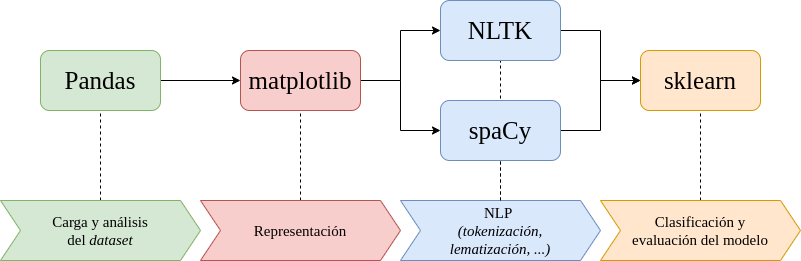

**Carga, análisis y representación del *dataset***

In [27]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score


def clean_dataset(films_df):
    films_df.dropna(inplace=True)
    empty_reviews = []
    for i, label, review in films_df.itertuples():
        if review.isspace():
            empty_reviews.append(i)
    films_df.drop(empty_reviews, inplace=True)


films_df = pd.read_csv('resources/films.tsv', sep='\t')
clean_dataset(films_df)
display(films_df)

,label,review
0,pos,the happy bastard's 30-second review \r\nbig d...
1,neg,hollywood never fails to astound me . \r\never...
2,neg,"this is your definitive "" hollywood "" movie , ..."
3,pos,for those of us who weren't yet born when the ...
5,neg,"there's a good , and timely , story trapped de..."
...,...,...
1467,pos,niagara niagara ( r ) bob gosse's niagara niag...
1469,pos,one of the funniest carry on movies and the th...
1470,pos,synopsis : bobby garfield ( yelchin ) lives in...
1471,pos,"a sci fi/comedy starring jack nicholson , pier..."


Ahora, vamos a representar el ratio de valoraciones negativas y positivas que hay en el conjunto de datos.

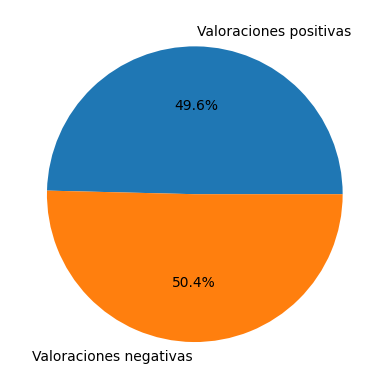

In [28]:
total_len = len(films_df)
pos_len   = len(films_df[films_df['label'] == 'pos'])
pos_ratio = pos_len * 100 / total_len
neg_len   = len(films_df[films_df['label'] == 'neg'])
neg_ratio = neg_len * 100 / total_len

labels = ['Valoraciones positivas', 'Valoraciones negativas']
values = [pos_ratio, neg_ratio] 
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

Al igual que ocurría con el caso anterior, no tenemos muchas propiedades, a parte de los textos, que podamos explotar. Por tanto, vamos a proceder con la fase de procesamiento de lenguaje de las valoraciones y seguiremos con el entrenamiento y evaluación del modelo.

**NLP con *spaCy* y entrenamiento y evaluación del modelo de clasificación**

Esta vez, vamos a aprovechar la función ya implementada en secciones previas para procesar y preparar el texto para su clasificación. Todo el código que se presenta a continuación debería ser muy familiar, excepto que esta vez se utiliza la clase *LinearSVC* como algoritmo de clasificación en vez de un *RandomForestClassifer*. La razón es que para este problema proporciona mejores resultados. 

El algoritmo *LinearSVC* (*Support Vector Classification*) es un algoritmo de aprendizaje automático utilizado para la clasificación de datos, especialmente útil cuando se trabaja con conjuntos de datos linealmente separables, donde las muestras de diferentes clases se pueden separar con un hiperplano en el espacio de características. Al utilizar un kernel lineal, *LinearSVC* es eficiente en términos computacionales y puede manejar conjuntos de datos de gran tamaño.

In [29]:
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    films_df['review'], 
    films_df['label'], 
    test_size=0.3, 
    random_state=42)

pipeline = Pipeline([
    ('Vectorizar', CountVectorizer(analyzer=clean_text_with_spacy)),
    ('Transformar', TfidfTransformer()), 
    ('Classificar', LinearSVC())
])

pipeline.fit(train_reviews, train_labels)
predictions = pipeline.predict(test_reviews)
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

         neg       0.62      0.61      0.62       215
         pos       0.61      0.61      0.61       212

    accuracy                           0.61       427
   macro avg       0.61      0.61      0.61       427
weighted avg       0.61      0.61      0.61       427



**NLP con *NLTK* y entrenamiento y evaluación del modelo de clasificación**

In [30]:
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    films_df['review'], 
    films_df['label'], 
    test_size=0.3, 
    random_state=42)

pipeline = Pipeline([
    ('Vectorizar', CountVectorizer(analyzer=clean_text_with_nltk)),
    ('Transformar', TfidfTransformer()), 
    ('Classificar', LinearSVC())
])

pipeline.fit(train_reviews, train_labels)
predictions = pipeline.predict(test_reviews)
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

         neg       0.83      0.81      0.82       215
         pos       0.82      0.83      0.83       212

    accuracy                           0.82       427
   macro avg       0.82      0.82      0.82       427
weighted avg       0.82      0.82      0.82       427



Como se pueden ver, los resultados oscilan al rededor de una precisión del 80% en la clasificación de valoraciones positivas y negativas. 

**Análisis con Vader**

Ahora vamos a utiliar el mismo *dataset* para realizar una predicción basándonos unicamente en el análisis de significado con *VADER* (Valence Aware Dictionary and sEntiment Reasoner). *VADER* es un modelo de análisis de sentimientos proporcionado por la librería *NLTK* diseñado específicamente para el procesamiento de texto en redes sociales. A diferencia de otros enfoques que solo se basan en palabras individuales, *VADER* tiene en cuenta el contexto y la puntuación de las palabras para determinar el sentimiento asociado. El funcionamiento del modelo se basa en un diccionario predefinido de palabras y expresiones con sus respectivas puntuaciones de sentimiento. Cada palabra o expresión en el texto se asigna a un valor de polaridad (positivo, negativo o neutro) y a un valor de intensidad. La puntuación final de sentimiento se calcula considerando la suma de las puntuaciones de las palabras y expresiones presentes en el texto.

In [31]:
import nltk
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')

Primero, cargamos los datos y eliminamos las filas con valores nulos o sin valoraciones. Seguidamente vamos a analizar el significado y sentimiento de las valoraciones con *VADER*. Esta fase se ha realizado en tres pasos. En primer lugar, cada valoración es analizada obteniendo una puntuación negativa, neutral, positiva y compuesta utilizando la función *polarity_scores*. Luego, el resultado de la valoración compuesta de cada valoración se registra en una columna nueva del *dataframe* denominada *result*. Finalmente, esta valoración compuesta guardada en la columna *result* es evaluada para dar un resultado 'positivo' si es mayor o igual que cero o 'negativo' en caso contrario.  

In [32]:
films_df = pd.read_csv('resources/films.tsv', sep='\t')
clean_dataset(films_df)

analyzer = SentimentIntensityAnalyzer()
films_df['analysis'] = films_df['review'].apply(lambda review: analyzer.polarity_scores(review))
films_df['result'] = films_df['analysis'].apply(lambda analysis: analysis['compound'])
films_df['prediction'] = films_df['result'].apply(lambda result: 'pos' if result >= 0 else 'neg')
display(films_df)

,label,review,analysis,result,prediction
0,pos,the happy bastard's 30-second review \r\nbig d...,"{'neg': 0.061, 'neu': 0.755, 'pos': 0.183, 'co...",0.9957,pos
1,neg,hollywood never fails to astound me . \r\never...,"{'neg': 0.135, 'neu': 0.766, 'pos': 0.099, 'co...",-0.9926,neg
2,neg,"this is your definitive "" hollywood "" movie , ...","{'neg': 0.056, 'neu': 0.817, 'pos': 0.127, 'co...",0.9877,pos
3,pos,for those of us who weren't yet born when the ...,"{'neg': 0.052, 'neu': 0.807, 'pos': 0.141, 'co...",0.9954,pos
5,neg,"there's a good , and timely , story trapped de...","{'neg': 0.172, 'neu': 0.707, 'pos': 0.121, 'co...",-0.9721,neg
...,...,...,...,...,...
1467,pos,niagara niagara ( r ) bob gosse's niagara niag...,"{'neg': 0.049, 'neu': 0.821, 'pos': 0.129, 'co...",0.9748,pos
1469,pos,one of the funniest carry on movies and the th...,"{'neg': 0.057, 'neu': 0.798, 'pos': 0.145, 'co...",0.9910,pos
1470,pos,synopsis : bobby garfield ( yelchin ) lives in...,"{'neg': 0.073, 'neu': 0.744, 'pos': 0.184, 'co...",0.9925,pos
1471,pos,"a sci fi/comedy starring jack nicholson , pier...","{'neg': 0.113, 'neu': 0.734, 'pos': 0.154, 'co...",0.9290,pos


Finalmente, se evaluan los resultados del modelo. En este caso, podemos utilizar todo el conjunto como datos de prueba ya que no hemos entrenado el modelo basándonos en las características de los datos.

In [33]:
print(classification_report(films_df['label'], films_df['prediction']))

              precision    recall  f1-score   support

         neg       0.74      0.44      0.55       717
         pos       0.60      0.85      0.70       706

    accuracy                           0.64      1423
   macro avg       0.67      0.64      0.62      1423
weighted avg       0.67      0.64      0.62      1423

